<a href="https://colab.research.google.com/github/Anthonyma0706/cmap_data_BQ_toolkit_instruction/blob/main/%E2%80%9CBQ_toolkit_demo_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cmapBQ Tutorial

This notebook is meant to show a few examples of exploring, selecting and retrieving data available within LINCS-CMap datasets from Google BigQuery.

`cmapBQ` allows for targeted retrieval of relevant gene expression data from the resources provided by The Broad Institute and LINCS Project

### Package installation

The cmapBQ package is available from `pip` and can be installed using the command below. Documentation is available on [Read The Docs](https://cmapbq.readthedocs.io/en/latest/)

In [2]:
!pip -q install cmapBQ

     |████████████████████████████████| 150 kB 13.5 MB/s 


### Standard Imports

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import requests

import matplotlib.pyplot as plt

### Credentials Setup and Package imports

Getting demo credentials from S3. To access BigQuery, a service account JSON credentials file must be obtained. Running the `cmap.config.setup_credentials(credentials_path)` function will point the toolkit to the credentials connected to your Google Account. 

More information about service accounts are available here: [Getting started with authentication](https://cloud.google.com/docs/authentication/getting-started)

In [4]:
""" Delete line if without Google Cloud credentials

import requests

# URL with credentials
url = ('https://s3.amazonaws.com/data.clue.io/api/bq_creds/BQ-demo-credentials.json')

response = requests.get(url)
credentials_filepath='/content/BQ-demo-credentials.json'

with open(credentials_filepath, 'w') as f:
  f.write(response.text)

"""

" Delete line if without Google Cloud credentials\n\nimport requests\n\n# URL with credentials\nurl = ('https://s3.amazonaws.com/data.clue.io/api/bq_creds/BQ-demo-credentials.json')\n\nresponse = requests.get(url)\ncredentials_filepath='/content/BQ-demo-credentials.json'\n\nwith open(credentials_filepath, 'w') as f:\n  f.write(response.text)\n\n"

Pointing cmapBQ to credentials file

In [5]:
import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config

credentials_filepath='/content/my-cmap-project-8881ec24d353.json'
# Set up credentials
cmap_config.setup_credentials(credentials_filepath)
bq_client = cmap_config.get_bq_client()

GOOGLE_APPLICATION_CREDENTIALS not valid, check credentials parameter in ~/.cmapBQ/config.txt


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div style="font-size: 10pt;line-height:30px">
    
Alternative method of authentication:

In [ ]:
#from google.cloud import bigquery
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_filepath
#bq_client = bigquery.Client()

# BigQuery Table Information

### The data hosted on BigQuery is organized in the following tables

<div style="font-size: 10pt;line-height:18px;font-weight:normal">
    
**compoundinfo:** <br> Metadata for all unique compounds included in the data release. Each row contains information about a unique compound such as MoA, target, etc. 
    
**instinfo:**  <br> Sample level metadata includes information for each replicate including experimental parameters such as timepoint and dose

**siginfo:**  <br> Signature (replicate collapsed) level 5 metadata. Includes experimental parameters such as timepoint and dose as well as metrics for bioactivity such as `tas` for [Transcriptional Activity Score](https://clue.io/connectopedia/signature_quality_metrics) and `cc_q75` for Replicate Correlation

**L1000 Level3:**  <br> Gene expression (GEX, Level 2) are normalized to invariant gene set curves and quantile normalized across each plate. Here, the data from each perturbagen treatment is referred to as a profile, experiment, or instance. Additional values for 11,350 additional genes not directly measured in the L10000 assay are inferred based on the normalized values for the 978 landmark genes.

    
**L1000 Level4:**  <br> Z-scores for each gene based on Level 3 with respect to the entire plate population. This comparison of profiles to their appropriate population control generates a list of differentially expressed genes.

**L1000 Level5:** <br> Replicate-collapsed z-score vectors based on Level 4. Replicate collapse generates one differential expression vector, which we term a signature. Connectivity analyses are performed on signatures.
    
**geneinfo:** <br> Metadata for gene_ids included in the data release. Each row contains mappings between gene_symbol, ensemble_id, gene_id as well as information about gene_type

**cellinfo:** <br> Metadata for cell lines included in the data release. Each row contains information such as cell_iname, ccle_name or cell_lineage

**genetic_pertinfo**: <br> Contains information related to genetic perturbagens such as type ['oe', 'sh', 'xpr'] and relevant gene_id, ensemble_id 


# Raw SQL Queries

`cmapBQ.query.list_tables()` function will display table adresses of default tables for usage in SQL queries

In [1]:
import cmapBQ.query as cmap_query

cmap_query.list_tables()

ModuleNotFoundError: ignored

Raw SQL queries can be run on the public datasets as shown below. Syntax follows that of Google Biqquery, available here: https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax

### Example SQL Query 

In [ ]:
## This query may take up to a minute
query = "SELECT COUNT(DISTINCT(cid)) as num_level5_sigs FROM cmap-big-table.cmap_lincs_public_views.L1000_Level5"

cmap_query.run_query(query=query, client=bq_client).result().to_dataframe()

# cmapBQ Utilities

`cmapBQ` provides a multitude of utility functions to survey and retrieve data hosted on BigQuery. Below we will demonstrate a workflow for finding and analyzing data pertaining to an MoA of interest as an example.

# Get Table Schema Information

In [ ]:
cmap_query.list_tables()

_includes_clustered_tables: <bound method TableDirectory._includes_clustered_tables of TableDirectory(compoundinfo='cmap-big-table.cmap_lincs_public_views.compoundinfo', genetic_pertinfo='cmap-big-table.cmap_lincs_public_views.genetic_pertinfo', geneinfo='cmap-big-table.cmap_lincs_public_views.geneinfo', cellinfo='cmap-big-table.cmap_lincs_public_views.cellinfo', instinfo='cmap-big-table.cmap_lincs_public_views.instinfo', siginfo='cmap-big-table.cmap_lincs_public_views.siginfo', level3='cmap-big-table.cmap_lincs_public_views.L1000_Level3_cid', level3_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level3_rid', level3_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level3_landmark', level4='cmap-big-table.cmap_lincs_public_views.L1000_Level4_cid', level4_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level4_rid', level4_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level4_landmark', level5='cmap-big-table.cmap_lincs_public_views.L1000_Level5_cid', level5_rid='cmap-b

In [ ]:
cmap_query.get_table_info(bq_client, 'cmap-big-table.cmap_lincs_public_views.compoundinfo') 
cmap_query.list_cmap_compounds(bq_client)


,column_name,data_type
0,pert_id,STRING
1,cmap_name,STRING
2,target,STRING
3,moa,STRING
4,canonical_smiles,STRING
5,inchi_key,STRING
6,compound_aliases,STRING


In [ ]:
cmap_query.get_table_info(bq_client, 'cmap-big-table.cmap_lincs_public_views.siginfo')
# there is sig_id, which is the unique key we need to extract needed perturbagens/(drug, cell line combinations)
# The logic to get data is: 

,column_name,data_type
0,bead_batch,STRING
1,nearest_dose,FLOAT64
2,pert_dose,FLOAT64
3,pert_dose_unit,STRING
4,pert_idose,STRING
5,pert_itime,STRING
6,pert_time,FLOAT64
7,pert_time_unit,STRING
8,cell_mfc_name,STRING
9,pert_mfc_id,STRING


In [ ]:
cmap_query.get_table_info(bq_client, 'cmap-big-table.cmap_lincs_public_views.L1000_Level5_cid') 

,column_name,data_type
0,cid,STRING
1,rid,STRING
2,value,FLOAT64


In [ ]:
config = cmap_config.get_default_config()
compoundinfo_table = config.tables.compoundinfo

QUERY = ( 'SELECT moa, ' 
'COUNT(DISTINCT(pert_id)) AS count ' 
'FROM `{}` ' 
'GROUP BY moa')

QUERY = QUERY.format(compoundinfo_table)
cmap_query.run_query(bq_client, QUERY).result().to_dataframe()

In [ ]:
cmap_query.list_cmap_compounds(bq_client)

,cmap_name
0,L-theanine
1,L-citrulline
2,BRD-A18795974
3,BRD-A27924917
4,BRD-A35931254
...,...
33622,TAS-301
33623,goserelin-acetate
33624,triptorelin
33625,T-98475


### Metadata at a glance

In [ ]:
moas = cmap_query.list_cmap_moas(bq_client)
display(moas)
cmap_query.list_cmap_compounds(bq_client)

,moa,count
0,None,31262
1,CAR agonist,2
2,ALK inhibitor,7
3,Akt inhibitor,13
4,BCL inhibitor,11
...,...,...
653,Telomerase reverse transcriptase expression in...,1
654,Gonadotropin releasing factor hormone receptor...,2
655,Gonadotropin releasing factor hormone receptor...,1
656,"Precursor for food preservatives, plasticizers...",1


,cmap_name
0,L-theanine
1,L-citrulline
2,BRD-A18795974
3,BRD-A27924917
4,BRD-A35931254
...,...
33622,TAS-301
33623,goserelin-acetate
33624,triptorelin
33625,T-98475


In [ ]:
targets = cmap_query.list_cmap_targets(bq_client)
display(targets.sort_values('count'))

In [ ]:
display(
    moas[moas['moa'].str.contains('Glucocorticoid receptor agonist', na=False)]
)
display(
    targets[targets['target'].str.contains('EGFR', na=False)]
)

NameError: ignored

# Analysis 1 - Comparison of MoA concordance across various cell lines

## Compound Information Table

<div style="font-size: 12pt;line-height:20px">

If the desired target or MoA is present, we can then query the compound table to get information about what compounds may relate to that MoA

In [ ]:
#moa = 'Glucocorticoid receptor agonist'
#moa = 'EGFR inhibitor'

#moa compound info
#moa_cpinfo = cmap_query.cmap_compounds(client=bq_client,
  moa=moa, 
  #verbose=True,
)
moa_cpinfo.sample(10)

,pert_id,cmap_name,target,moa,canonical_smiles,inchi_key,compound_aliases
71,BRD-K92310201,mometasone,NR3C1,Glucocorticoid receptor agonist,C[C@@H]1C[C@H]2[C@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,WOFMFGQZHJDGCX-CLWZPKSSSA-N,None
32,BRD-K30207000,dexamethasone,NR3C1,Glucocorticoid receptor agonist,C[C@@H]1C[C@H]2[C@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,AKUJBENLRBOFTD-ARBOEXFKSA-N,None
26,BRD-K53342282,cortisol,NR3C1,Glucocorticoid receptor agonist,CC(=O)OCC(=O)[C@@]1(O)CC[C@@H]2[C@@H]3CCC4=CC(...,ALEXXDVDDISNDU-FPNXCIAJSA-N,None
75,BRD-A78391468,prednisolone-hemisuccinate,NR3C1,Glucocorticoid receptor agonist,C[C@]12C[C@H](O)C3C(CCC4=CC(=O)C=C[C@]34C)C1CC...,APGDTXUMTIZLCJ-PILPDLGISA-N,None
13,BRD-A02180903,betamethasone,NR3C1,Glucocorticoid receptor agonist,C[C@H]1CC2C3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@...,UREBDLICKHMUKA-REKGUKDCSA-N,None
41,BRD-A01346607,flumetasone,NR3C1,Glucocorticoid receptor agonist,C[C@@H]1CC2C3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@...,WXURHACBFYSXBI-DRBBXQFKSA-N,None
82,BRD-K23714869,triamcinolone,NR3C1,Glucocorticoid receptor agonist,C[C@]12C[C@H](O)[C@@]3(F)[C@H](CCC4=CC(=O)C=C[...,GFNANZIMVAIWHM-YAQGJSIVSA-N,None
7,BRD-A16478930,amcinonide,NR3C1,Glucocorticoid receptor agonist,CC(=O)OCC(=O)C12OC3(CCCC3)OC1CC1C3CCC4=CC(=O)C...,ILKJAFIWWBXGDU-UHFFFAOYSA-N,None
51,BRD-K62310379,fluticasone-propionate,PGR,Glucocorticoid receptor agonist,CCC(=O)O[C@@]1([C@H](C)C[C@H]2[C@@H]3C[C@H](F)...,WMWTYOKRWGGJOA-CENSZEJFSA-N,None
53,BRD-K71451869,halcinonide,NR3C1,Glucocorticoid receptor agonist,CC1(C)O[C@@H]2C[C@H]3[C@H]4CCC5=CC(=O)CC[C@]5(...,MUQNGPZZQDCDFT-VDJZZIFASA-N,None


<div style="font-size: 12pt;line-height:20px">

Lets take the first 10 compounds and see how many signatures are available for those compounds. We can pass a list of compounds to the **cmap_sig function**, which then queries the dataset for compounds that match.

In [ ]:
moa_cps = moa_cpinfo.cmap_name.unique()
moa_cps

array(['dexamethasone', 'mometasone', 'flumetasone', 'alclometasone',
       'amcinonide', 'beclometasone', 'beclomethasone-dipropionate',
       'betamethasone', 'betamethasone-acetate', 'betamethasone-valerate',
       'budesonide', 'ciclesonide', 'clobetasol', 'clocortolone',
       'cortisol', 'cortisone-acetate', 'deflazacort',
       'dexamethasone-acetate', 'diflorasone', 'fludrocortisone-acetate',
       'fluocinolone-acetonide', 'fluticasone', 'fluticasone-propionate',
       'halcinonide', 'halometasone', 'hydrocortisone',
       'hydrocortisone-acetate', 'hydrocortisone-hemisuccinate',
       'hydrocortisone-valerate', 'isoflupredone',
       'isoflupredone-acetate', 'loteprednol', 'medrysone',
       'methylprednisolone', 'piretanide', 'prednisolone-acetate',
       'prednisolone-hemisuccinate', 'prednisone', 'rimexolone',
       'triamcinolone'], dtype=object)

## Cell Line information

In [ ]:
core_cell_lines = ['U2OS'] #['A375', 'A549', 'HCC515', 'HEPG2', 'MCF7', 'PC3', 'VCAP', 'HT29', 'HA1E']

core_cellinfo = cmap_query.cmap_cell(bq_client, 
  cell_iname=core_cell_lines, 
  verbose=True,
)
core_cellinfo.head(10)

Table: 
 cmap-big-table.cmap_lincs_public_views.cellinfo
Query:
 SELECT * FROM cmap-big-table.cmap_lincs_public_views.cellinfo WHERE cell_iname in UNNEST(['U2OS'])


,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
0,U2OS,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS


## Query Siginfo 

<div style="font-size: 12pt;line-height:20px">


The siginfo file provides information on the conditions for each experiment such as compound, dose, timepoint, cell line, and more.

The table also includes information regarding the signal strength and replicate correlation of the compound. The `tas` contains the signatures **Transcriptional Activity Score (TAS)** which is an aggregate measure of strength and reproducibilty.  [More information about signature quality metrics can be found on Connectopedia](https://clue.io/connectopedia/signature_quality_metrics)

In [ ]:
sample_cell_lines = list(core_cellinfo.cell_iname.unique()) #core_cell_lines

'''sample_compounds = list(moa_cps)
print("Compounds: {}".format(sample_compounds))
print("Cell Lines: {}".format(sample_cell_lines))
'''
siginfo_sample = cmap_query.cmap_sig(     #Query the siginfo table
    bq_client, 
    #cmap_name = sample_compounds,
    cell_iname = sample_cell_lines,
    return_fields = 'all'  # we usually use the default attributes
)

#siginfo_sample = siginfo_sample.loc[     #Filter returned table 
    #(siginfo_sample.nsample >= 3)
    # &
    #((abs(siginfo_sample.pert_dose - 10) <0.01) | (abs(siginfo_sample.pert_dose - 5) <0.01) )
    
    #(siginfo_sample.pert_itime.eq('24 h'))
#]


siginfo_sample = siginfo_sample.merge(core_cellinfo, on='cell_iname') #join with cellinfo table to get cell lineage information
siginfo_sample.sample(5)

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,nsample,cc_q75,ss_ngene,tas,pct_self_rank_q25,wt,median_recall_rank_spearman,median_recall_rank_wtcs_50,median_recall_score_spearman,median_recall_score_wtcs_50,batch_effect_tstat,batch_effect_tstat_pct,is_hiq,qc_pass,pert_id,sig_id,pert_type,cell_iname,id,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_ncs_exemplar,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
23490,b41,0.05,0.049936,uM,0.05 uM,6 h,6.0,h,U2OS,BRD-K94441233,4,0.1579,101,0.127697,1.9218,"0.19,0.42,0.18,0.21",10.274800,34.05310,0.107275,0.286623,25.87,88.68790,0,0,BRD-K94441233,LKCP002_U2OS_6H:A06,trt_cp,U2OS,None,A06,LKCP002_U2OS_6H_X1.A2_B41|LKCP002_U2OS_6H_X2.A...,LKCP002_U2OS_6H_X1.A2_B41:A06|LKCP002_U2OS_6H_...,None,LKCP,mevastatin,0,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS
13805,b1,10.00,10.114000,uM,10 uM,6 h,6.0,h,U2OS,BRD-K21536131-001-01-3,3,0.1100,141,0.125932,24.7505,"0.47,0.47,0.07",60.197400,58.02930,-0.011896,0.000000,1.11,9.13006,0,1,BRD-K21536131,PAC036_U2OS_6H:BRD-K21536131-001-01-3:10.114,trt_cp,U2OS,None,A22,PAC036_U2OS_6H_X1_B1_UNI4445R|PAC036_U2OS_6H_X...,PAC036_U2OS_6H_X1_B1_UNI4445R:A22|PAC036_U2OS_...,None,PAC,BRD-K21536131,1,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS
4721,b15,NaN,1.000000,uL,1 uL,72 h,72.0,h,U2OS,BRDN0000464882,2,0.4687,244,0.341958,0.0000,"0.50,0.50",0.414831,0.68167,0.468731,0.697718,16.11,69.02100,1,1,BRDN0000464882,TA.OE005_U2OS_72H:BRDN0000464882:1,trt_oe,U2OS,None,M10,TA.OE005_U2OS_72H_X1_B15|TA.OE005_U2OS_72H_X2....,TA.OE005_U2OS_72H_X1_B15:M10|TA.OE005_U2OS_72H...,None,TA,MAP3K9,1,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS
4763,b15,NaN,1.000000,uL,1 uL,72 h,72.0,h,U2OS,BRDN0000459470,2,0.1853,81,0.123883,0.0000,"0.50,0.50",9.230750,5.34284,0.185308,0.443083,16.11,69.02100,0,1,BRDN0000459470,TA.OE005_U2OS_72H:BRDN0000459470:1,trt_oe,U2OS,None,G20,TA.OE005_U2OS_72H_X1_B15|TA.OE005_U2OS_72H_X2....,TA.OE005_U2OS_72H_X1_B15:G20|TA.OE005_U2OS_72H...,None,TA,PRKCE,1,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS
2406,b1,10.00,10.139900,uM,10 uM,6 h,6.0,h,U2OS,BRD-K97236134-001-01-6,1,0.0000,0,0.000000,0.0000,1.00,0.000000,0.00000,0.000000,0.000000,-1.22,2.92851,0,1,BRD-K97236134,PAC028_U2OS_6H:BRD-K97236134-001-01-6:10.1399,trt_cp,U2OS,None,C20,PAC028_U2OS_6H_X3_B1_UNI4445R,PAC028_U2OS_6H_X3_B1_UNI4445R:C20,None,PAC,BRD-K97236134,0,CVCL_0042,15,None,None,60,McCoy's 5A ATCC catalog # 3-27,HTB-96,c-62,tumor,Caucasian,F,Primary,bone,bone cancer,osteosarcoma,ATCC,adherent,U2OS_BONE,2T|U-2 OS


In [ ]:
siginfo_sample.sig_id

0        PAC013_U2OS_6H:BRD-A18477699-001-01-1:10.1192
1        PAC052_U2OS_6H:BRD-K09725203-001-01-1:10.0397
2        PAC054_U2OS_6H:BRD-K53988836-001-01-5:9.97739
3           PAC052_U2OS_6H:BRD-K05396879-001-03-4:6.32
4             PAC002_U2OS_6H:BRD-K52379519-001-02-0:10
                             ...                      
26400                             LKCP001_U2OS_48H:H10
26401                             LKCP001_U2OS_48H:H04
26402                             LKCP001_U2OS_48H:D13
26403                             LKCP001_U2OS_48H:C21
26404                             LKCP001_U2OS_48H:C22
Name: sig_id, Length: 26405, dtype: object

In [ ]:
#type(siginfo_sample)

#siginfo_sample.to_csv('siginfo_U2OS_all.csv', index=False)
#!cp siginfo_U2OS.csv "/content"

cp: cannot stat 'siginfo_U2OS.csv': No such file or directory


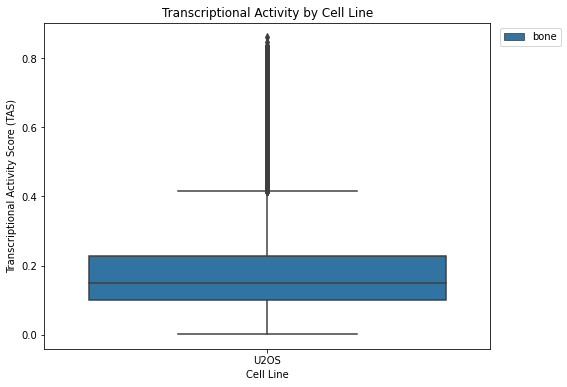

In [ ]:
plt.figure(figsize=(8,6))

sorted_index = siginfo_sample.groupby('cell_iname').median().sort_values('tas').index

sns.boxplot(
    data=siginfo_sample,
    x='cell_iname',
    y='tas',
    hue='cell_lineage',
    dodge=False,
    order=sorted_index
);

plt.title('Transcriptional Activity by Cell Line')
plt.xlabel('Cell Line')
plt.ylabel('Transcriptional Activity Score (TAS)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01,1))
plt.show()

## Numerical Data

### Extracting Numerical data using `cmapBQ.query.cmap_matrix`

In [ ]:
sig_ids = siginfo_sample.sig_id.unique() #sig_ids are unique for each signature and relates siginfo table to numerical data

sample_data_numerical = cmap_query.cmap_matrix(bq_client,
    data_level='level5',
    feature_space='landmark', #Choices ['landmark', 'bing', 'aig']
    cid=list(sig_ids)[8000:12000], #columns are signatures -> cannot exceed 4000!
)

print( sample_data_numerical.data_df.shape )
write_gctx(sample_data_numerical, 'sample_data_U2OS_part3.gctx')

Running query ... (1/4)
Total bytes processed: 171.6MiB
Total bytes billed: 171.6MiB
Running query ... (2/4)
Total bytes processed: 105.3MiB
Total bytes billed: 105.3MiB
Running query ... (3/4)
Total bytes processed: 145.7MiB
Total bytes billed: 145.7MiB
Running query ... (4/4)
Total bytes processed: 129.1MiB
Total bytes billed: 129.1MiB
Pivoting Dataframes to GCT objects
Complete
(978, 4000)


26405

`cmap_matrix` returns a GCToo object, part of the cmapPy resource. Documentation on the GCToo object structure and useful cmapPy utilities can be found in the cmapPy documentation here: https://cmappy.readthedocs.io/en/stable/

### Write to file as GCTX

In [ ]:
from cmapPy.pandasGEXpress.write_gctx import write as write_gctx
from cmapPy.pandasGEXpress.write_gct import write as write_gct

write_gctx(sample_data_numerical, 'sample_data_U2OS_part1.gctx')
#write_gct(sample_data_numerical, filename)

## Pairwise Correlations

In [ ]:
corr_matrix = sample_data_numerical.data_df.corr()
print(corr_matrix.shape)

### Function definitions

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch
import numpy as np


def get_off_diagonals(matrix):
  """
  Extract off-diagonal elements of matrix as list of values

  Parameters
  ----------
  matrix: pandas.DataFrame or numpy.ndarray, NxN matrix
  
  Returns
  -------
  """
  return matrix.where(
    np.triu(np.ones(matrix.shape).astype(bool), k=1)
  ).stack().reset_index(drop=True)

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

def get_subplot_dimensions(num_plots):
    if num_plots % 4 == 0:
      return num_plots//4, 4
    elif num_plots % 3 == 0:
      return num_plots//3, 3
    elif num_plots % 2 == 0:
      return num_plots//2, 2
    elif num_plots % 1 == 0:
      return num_plots//1, 1




### Histograms

In [ ]:
#Lists used for sns.boxplot
dist_list = []
cell_list = siginfo_sample.groupby('cell_iname').median().sort_values('tas').index

lineage_list = []

#ncols=4
#nrows=2
subplot_size = 5
nrows, ncols = get_subplot_dimensions(len(cell_list))
fig_dist, axes_dist = plt.subplots(nrows, ncols, figsize=(subplot_size*ncols,subplot_size*nrows))


for i,cell in enumerate(cell_list):

  lineage = core_cellinfo.loc[
        core_cellinfo.cell_iname.eq(cell)
      ].cell_lineage.unique()[0]  #Lineage information for cell line

  cell_sig_ids = siginfo_sample.loc[
    siginfo_sample.cell_iname.eq(cell)
  ].sig_id.unique()  #Get sig_ids for cell line

  cell_corrs = corr_matrix.loc[cell_sig_ids, cell_sig_ids] #Extract correlations for cell line
#  cell_corrs = cluster_corr(cell_corrs) #Cluster cell correlations
  
  dist = get_off_diagonals(cell_corrs) #Extract off-diagonals
  
  dist_list.append(dist)
  lineage_list.append(lineage)

  sns.histplot(dist, 
               binwidth=0.1,
               ax=axes_dist[i // ncols][i % ncols])
  axes_dist[i // ncols][i % ncols].set_title(
    'Distribution of pairwise connections in {} \n({})'.format(
        cell, 
        lineage
      )
    )
  axes_dist[i // ncols][i % ncols].set_xlim(-1, 1)
  axes_dist[i // ncols][i % ncols].set_xlabel('Correlation')
  axes_dist[i // ncols][i % ncols].set_xticks([-1, -0.5, 0, 0.5, 1])

plt.tight_layout()
plt.show()

### Boxplots

In [ ]:
plt.figure(figsize=(10,10))
colors_list = ['brown', 'red', 'orange', 'red', 'magenta', 'blue', 'cyan', 'green', 'green'] #manual coloring by cell_lineage

sns.boxplot(
    data=dist_list,
    palette=colors_list
    )

labels = ['{}\n({})'.format(cell_list[i], lineage_list[i]) for i in range(0,len(cell_list))]
plt.xticks(np.linspace(0,len(cell_list)-1, len(cell_list)), labels)

plt.ylabel('Pairwise Correlations')
plt.xlabel('Cell Line')
plt.ylim([-1,1])
plt.title('Comparison of {} concordance in Core Cell Lines'.format(moa))
plt.show()

### Heatmaps

#### Color Map Configuration

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

red_blue_map = cm.get_cmap('RdBu_r', 256)
tau_red_blue_90 = red_blue_map(np.linspace(0,1,200))
white = np.array([1, 1, 1, 1])
tau_red_blue_90[70:130, :] = white
tau_red_blue_90 = ListedColormap(tau_red_blue_90)

#### Full Correlation Matrix

In [ ]:
clustered_matrix = cluster_corr(sample_data_numerical.data_df.corr())

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(clustered_matrix, cmap=tau_red_blue_90, vmin=-1, vmax=1)
plt.show()

#### Pairwise correlations by Cell Line

In [ ]:
cell_list = siginfo_sample.groupby('cell_iname').median().sort_values('tas').index #sorted by median tas

nrows, ncols = get_subplot_dimensions(len(cell_list))
subplot_size = 5
fig_hm, axes_hm = plt.subplots(nrows, ncols, figsize=(subplot_size*ncols*1.4,subplot_size*nrows))

for i,cell in enumerate(cell_list):

  lineage = core_cellinfo.loc[
          core_cellinfo.cell_iname.eq(cell)
        ].cell_lineage.unique()[0]

  cell_siginfo = siginfo_sample.loc[
    siginfo_sample.cell_iname.eq(cell)
  ]

  cell_sig_ids = cell_siginfo.sig_id.unique()  
  
  cell_corrs = corr_matrix.loc[cell_sig_ids, cell_sig_ids]

  cell_corrs = cluster_corr(cell_corrs)

  cell_siginfo.set_index('sig_id').loc[cell_corrs.columns] #sort to match clustered matrix
  
  sns.heatmap(cell_corrs,
              cmap=tau_red_blue_90, 
              vmin=-1, 
              vmax=1,
              ax=axes_hm[i // ncols][i % ncols])
  
  axes_hm[i // ncols][i % ncols].set_xticklabels([]) 
  axes_hm[i // ncols][i % ncols].set_yticklabels(cell_siginfo.cmap_name) # Add compound names
  axes_hm[i // ncols][i % ncols].set_xlabel('')
  axes_hm[i // ncols][i % ncols].set_ylabel('')
  axes_hm[i // ncols][i % ncols].set_title('Cell Line: {}\n Cell Lineage: {}'.format(cell, lineage))

plt.tight_layout()


# Analysis 2 - Gene Mod

## Functions

In [ ]:
def genemod_histograms_by_cell(data, 
                               info,
                               cellinfo,
                               cell_order,
                               target,
                               level='level5', 
                               xlim=[-10, 10],
                               ylim=[0,10], 
                               metric_label='Normalized expression', 
                               plot_title=''):
    dist_list = []
    lineage_list = []

    subplot_size = 5
    nrows, ncols = get_subplot_dimensions(len(cell_order))
    fig_dist, axes_dist = plt.subplots(nrows, ncols, figsize=(subplot_size*ncols,subplot_size*nrows))

    for i,cell in enumerate(cell_order):
        lineage = cellinfo.loc[
              cellinfo.cell_iname.eq(cell)
            ].cell_lineage.unique()[0]  #Lineage information for cell line

        if level == 'level5':
          cell_sig_ids = info.loc[
            info.cell_iname.eq(cell)
          ].sig_id.unique()  #Get sig_ids for cell line
        elif level == 'level3':
          cell_sig_ids = info.loc[
            info.cell_iname.eq(cell)
          ].sample_id.unique()  #Get sig_ids for cell line
        
        cell_genemod = data.loc[str(target_gene_id), cell_sig_ids] #Extract correlations for cell line
  
        sns.histplot(cell_genemod, 
                    binwidth=0.1,
                    ax=axes_dist[i // ncols][i % ncols])
        
        axes_dist[i // ncols][i % ncols].set_title(
          '{} ({})'.format(
              cell, 
              lineage
            )
          )
        axes_dist[i // ncols][i % ncols].set_xlim(xlim)
        axes_dist[i // ncols][i % ncols].set_ylim(ylim)
        axes_dist[i // ncols][i % ncols].set_xlabel('{} for {}'.format(metric_label, target))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(plot_title, fontsize=15)
    plt.show()



def genemod_boxplot_by_cell(data, 
                            info,
                            cellinfo,
                            cell_order,
                            target,
                            colors_list = ['brown', 'red', 'orange', 'red', 'magenta', 'blue', 'cyan', 'green', 'green'],
                            level='level3', 
                            ylim=[0,14],
                            metric_label='Normalized expression',
                            plot_title=''):
    dist_list = []
    lineage_list = []

    for i,cell in enumerate(cell_order):
        lineage = cellinfo.loc[
              cellinfo.cell_iname.eq(cell)
            ].cell_lineage.unique()[0]  #Lineage information for cell line
        lineage_list.append(lineage)

        if level == 'level5':
          cell_sig_ids = info.loc[
            info.cell_iname.eq(cell)
          ].sig_id.unique()  #Get sig_ids for cell line
        elif level == 'level3':
          cell_sig_ids = info.loc[
            info.cell_iname.eq(cell)
          ].sample_id.unique()  #Get sig_ids for cell line
        
        cell_genemod = data.loc[str(target_gene_id), cell_sig_ids] #Extract correlations for cell line
        dist_list.append(cell_genemod)

    plt.figure(figsize=(10,10))
    colors_list = ['brown', 'red', 'orange', 'red', 'magenta', 'blue', 'cyan', 'green', 'green'] #manual coloring by cell_lineage

    sns.boxplot(
        data=dist_list,
        palette=colors_list
        )

    labels = ['{}\n({})'.format(cell_list[i], lineage_list[i]) for i in range(0,len(cell_list))]
    plt.xticks(np.linspace(0,len(cell_list)-1, len(cell_list)), labels)

    plt.ylabel('{} {}'.format(target, metric_label))
    plt.xlabel('Cell Line')
    plt.ylim(ylim)
    plt.title(plot_title)
    plt.show()


## Level 5 Gene Mod

Take a look the level 5 gene modulation of the target 

In [ ]:
target = 'NR3C1'
target_info = cmap_query.cmap_genes(bq_client, gene_symbol='NR3C1')
target_gene_id = target_info.gene_id.item()

### Histograms

In [ ]:
sample_data = sample_data_numerical.data_df

cell_sig_ids = siginfo_sample.loc[
  siginfo_sample.cell_iname.eq('MCF7')
].sig_id.unique()  #Get sig_ids for cell line

global_genemod = sample_data.loc[str(target_gene_id), :] #Extract correlations for target
sns.histplot(global_genemod, 
              binwidth=0.1).set_xlim(-10, 10)

plt.title('Global {} expression in core cell lines'.format(target))
plt.xlabel('Mod Z-Score for {}'.format(target))
plt.show()

In [ ]:
genemod_histograms_by_cell(sample_data, 
                           siginfo_sample, 
                           core_cellinfo, 
                           cell_list,
                           target=target, 
                           level='level5',
                           xlim=[-5,5],
                           metric_label='Mod Z-Scores',
                           plot_title='Distribution of Mod Z-Score values in Glucocorticoid Recepter Agonist treated wells')

In [ ]:
genemod_boxplot_by_cell(sample_data, 
                           siginfo_sample, 
                           core_cellinfo, 
                           cell_list,
                           target=target, 
                           level='level5',
                           metric_label='Normalized expression', 
                           ylim=[-10, 10],
                           plot_title='Distribution of NR3C1 mod z-scores in Glucocorticoid Recepter Agonist treated wells')

## Comparison of Normalized Gene Expression (level 3) profiles 




Within the siginfo table, a few fields can be used to track down the level 3 and 4 profiles that were collapsed into the level 5 signature. 


1. First is `distil_ids` which is a concatenation of `sample_id` values from the `instinfo` table. sample_ids can be recovered by splitting by the `|` delimiter

2. The `det_plates` field specifies which detection plate a profile was treated. In the `siginfo` table, this is often a concatenation of multiple values delimited by `|`. This can be useful for identifying control wells that from the same treatment plates as the treated wells.


In [ ]:
siginfo_sample.sample(5)[['distil_ids', 'det_plates']]

In [ ]:
distil_ids = siginfo_sample.apply(lambda row: row['distil_ids'].split('|'), axis=1)
sample_ids = [sample for id_list in distil_ids for sample in id_list]

In [ ]:
print("Number of sig_ids: {}".format(len(siginfo_sample)))
print("Number of sample_ids: {}".format(len(sample_ids)))

In [ ]:
instinfo = cmap_query.cmap_profiles(bq_client, sample_id=sample_ids)

In [ ]:
instinfo.sample(10)

### Get Level 3 data

In [ ]:
level3_data = cmap_query.cmap_matrix(bq_client, data_level='level3', cid=instinfo.sample_id.to_list(), limit=len(instinfo))

In [ ]:
level3_clustered_matrix = cluster_corr(level3_data.data_df.corr())

In [ ]:
global_genemod = level3_data.data_df.loc[str(target_gene_id), :] #Extract correlations for cell line
sns.histplot(global_genemod, 
              binwidth=0.1)

plt.title('Global {} expression in core cell lines'.format(target))
plt.xlabel('Mod Z-Score for {}'.format(target))
plt.show()

### Histograms

In [ ]:
genemod_histograms_by_cell(level3_data.data_df,
                           instinfo,
                           core_cellinfo,
                           cell_order=cell_list,
                           target=target,
                           level='level3',
                           xlim=[0, 14],
                           ylim=None,
                           metric_label='Normalized expression', 
                           plot_title='Distribution of normalized expression in Glucocorticoid Recepter Agonist treated wells')

### Boxplots

In [ ]:
genemod_boxplot_by_cell(level3_data.data_df,
                           instinfo,
                           core_cellinfo,
                           cell_order=cell_list,
                           target=target,
                           level='level3',
                           metric_label='Normalized expression', 
                           plot_title='Distribution of normalized expression in Glucocorticoid Recepter Agonist treated wells')

## Comparison of Target Gene Expression in Control Wells

### Getting data for control wells within the same plate as treatements

In [ ]:
print("Number of unique plates: {}".format(len(instinfo.det_plate.unique())))

In [ ]:
types = [
         'ctl_vehicle', 
#         'ctl_untrt'
    ]

ctl_instinfo = cmap_query.cmap_profiles(bq_client, pert_type=types , det_plate=list(instinfo.det_plate.unique()))

print("Length of ctl instinfo: {}".format(len(ctl_instinfo)))

In [ ]:
ctl_instinfo.sample(10)

In [ ]:
ctl_data = cmap_query.cmap_matrix(bq_client, data_level='level3', cid=list(ctl_instinfo.sample_id), limit=10000)

target_ctl_genemod = ctl_data.data_df.loc[str(target_gene_id), :]

### Histograms

In [ ]:
sns.histplot(target_ctl_genemod, 
              binwidth=0.1)

plt.title('Distribution of normalized expression\n values for {} in core cell lines'.format(target))
plt.xlabel('Normalized expression values for {}'.format(target))
plt.show()

In [ ]:
genemod_histograms_by_cell(ctl_data.data_df,
                           ctl_instinfo,
                           core_cellinfo,
                           cell_list,
                           target=target,
                           level='level3',
                           xlim=[0,14], ylim=None,
                           metric_label='normalized expression',
                           plot_title='Distribution of Normalized expression in Control Wells')

### Boxplots

In [ ]:
genemod_boxplot_by_cell(ctl_data.data_df,
                           ctl_instinfo,
                           core_cellinfo,
                           cell_order=cell_list,
                           target=target,
                           level='level3',
                           metric_label='Normalized expression',
                           plot_title='Distribution of Normalized expression in Control Wells')